# Dimensionality Reduction Notes

## Remaining Questions // Things to Look Into
* Is there a more space efficient way to store the expressions data than in the pandas dataframe oriented .csv it's currently in, or should we just compress it for the cloud and uncompress it when we're working with it?
* yes. these links: https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d, https://towardsdatascience.com/stop-persisting-pandas-data-frames-in-csvs-f369a6440af5, and https://analyticsindiamag.com/complete-guide-to-different-persisting-methods-in-pandas/. Seems like we should talk about these alternative formats as a group on Wednesday. 

* number of input variables (aka features)== dimensionality of dataset
* "Having a large number of dimensions in the feature space can mean that the volume of that space is very large, and in turn, the points that we have in that space (rows of data) often represent a small and non-representative sample. This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the 'curse of dimensionality.'"
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
* https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py  
* https://www.codegrepper.com/code-examples/python/pandas+set+first+row+as+column+names 


### PCA Attempt
* have the expressions been standardized or z-score normalized? Should make a couple plots of their values to see. If not, they should be scaled before PCA 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

feather_path = input('Enter path to local feather file: ')
tissue_df = pd.read_csv('https://raw.githubusercontent.com/HarritonResearchLab/genomics/main/exploring/first_topics/gene_prediction/tissue_prediction/data/tissue_df.csv')
tissues = np.array(tissue_df['tissue_ordinal'])
tissue_names = np.array(list(set(tissue_df['tissue_name'])))
feather_df = pd.read_feather(feather_path)

plt.rcParams['font.family']='serif'

Technique: this is how I applied ordinal encoding with a dictionary: 

```python
tissue_classes = {'cerebellum':0, 
                   'placenta':1,
                   'kidney':2, 
                   'endometrium':3,
                   'liver':4,
                   'colon':5,
                   'hippocampus':6}

tissues_ordinal = np.array([tissue_classes[tissue] for tissue in tissues])
```

## PCA

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(feather_df).reshape(2,189)

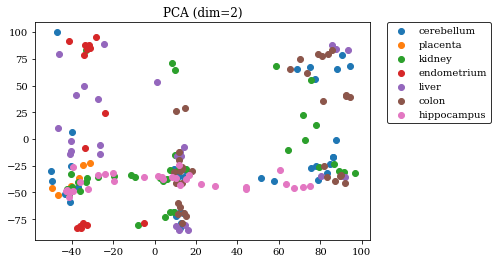

In [10]:
x_pca = X_pca[0]
y_pca = X_pca[1]

for item in tissue_classes.items(): 
    mask = np.where(tissues==item[1])
    plt.scatter(x_pca[mask], y_pca[mask],label=item[0])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., edgecolor='black')
plt.title('PCA (dim=2)')
plt.show()

## MDS

In [12]:
mds = MDS(random_state=0)
X_mds = mds.fit_transform(feather_df).reshape((2,189))

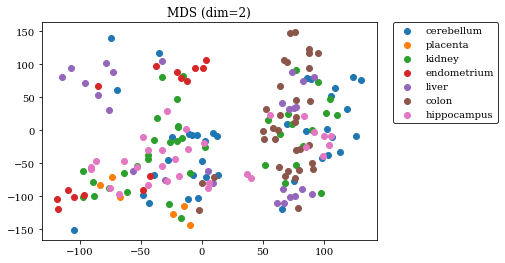

In [13]:
x_mds = X_mds[0]
y_mds = X_mds[1]

for item in tissue_classes.items(): 
    mask = np.where(tissues==item[1])
    plt.scatter(x_mds[mask], y_mds[mask],label=item[0])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., edgecolor='black')
plt.title('MDS (dim=2)')
plt.show()

### MDS-KNN Grid Search

In [2]:
ks = [3, 5, 7, 9, 11, 13]
dims = [2, 4, 6, 8, 10]

models = []

for k in ks: 
    for dim in dims: 

        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

        knn = KNeighborsClassifier(5)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)

        models.append([k, dim, acc])


print(models)

[[3, 2], [3, 4], [3, 6], [3, 8], [3, 10], [5, 2], [5, 4], [5, 6], [5, 8], [5, 10], [7, 2], [7, 4], [7, 6], [7, 8], [7, 10], [9, 2], [9, 4], [9, 6], [9, 8], [9, 10], [11, 2], [11, 4], [11, 6], [11, 8], [11, 10], [13, 2], [13, 4], [13, 6], [13, 8], [13, 10]]
